In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# 1. Read the dataset to the python environment

In [2]:
# Reading the data
data = pd.read_excel('iris.xls')

In [3]:
# Displaying the data
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


It contains five columns namely – Petal Length, Petal Width, Sepal Length, Sepal Width, and Species Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally.

In [4]:
# Checking the shape
data.shape

(150, 5)

Our dataset has 150 rows and 5 columns

In [5]:
# Checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
# Checking for data types
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [8]:
# statistical summary of data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps

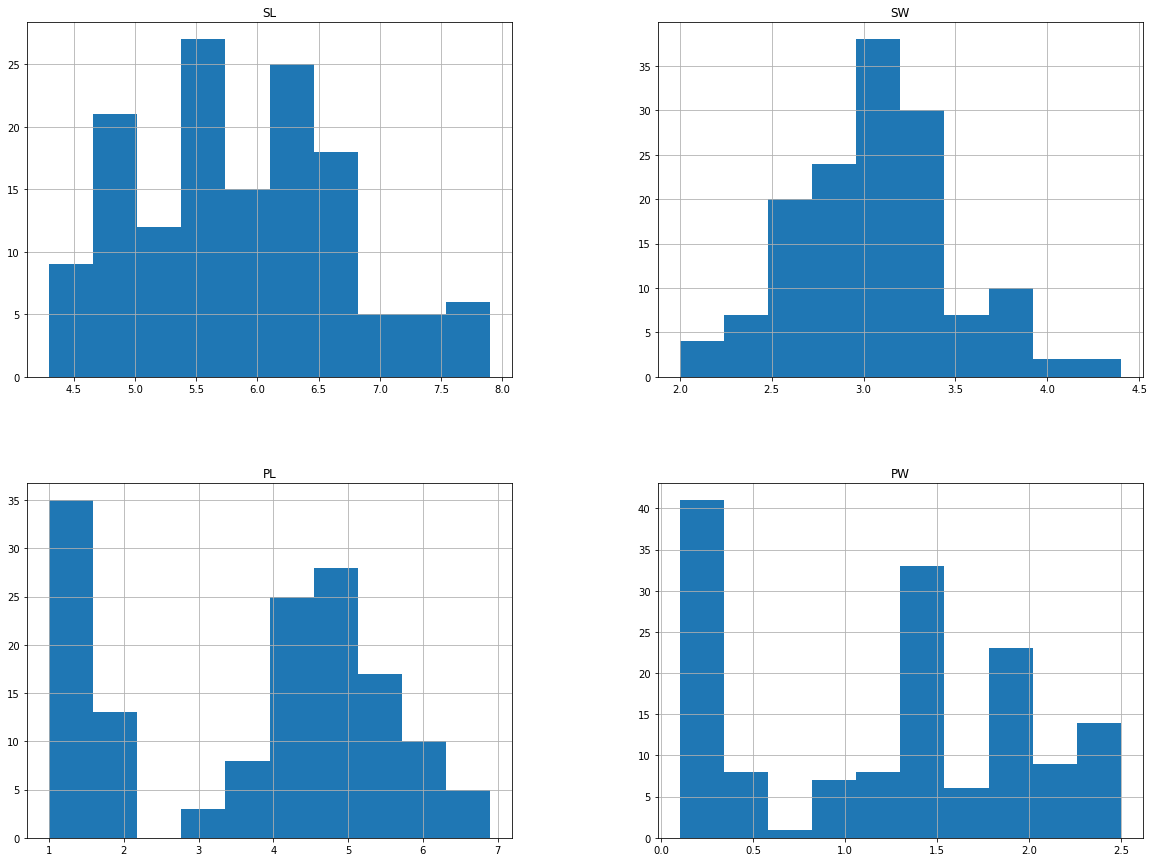

In [9]:
# Checking for skewness of data
freqgraph = data.select_dtypes(include = 'float')
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
# Except PW all others are normally distributed.

### Handling the null values 

In [11]:
# We can fill the missing values with median so that it won't be affected even if outliers are present.
data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())

In [12]:
# Checking for null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now there are no missing values in the data set.

### Handling the outliers

Text(0.5, 1.0, 'SL, SW, PL, PW')

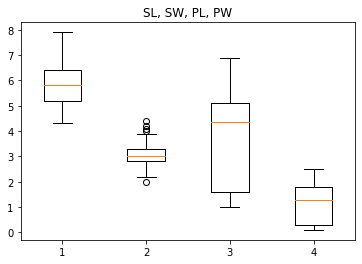

In [13]:
# Checking for outliers
plt.boxplot(data[['SL','SW','PL','PW']])
plt.title('SL, SW, PL, PW')

We have outliers in sepal width. Other parameters have no outliers

In [14]:
# We will use inter quartile range (IQR) to manage outliers.
# Normally the datapoints which fall below Q1-1.5(iqr) and above Q3+1.5(iqr) are considered as outliers.
Q1 = np.percentile(data['SW'],25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75, interpolation = 'midpoint')
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(lower_limit)
print(upper_limit)

2.1249999999999996
3.9250000000000003


In [15]:
# Finding outlier values in the column
outlier = []
for x in data['SW']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [16]:
# finding the index values of outlier
ind1 = data['SW'] > upper_limit
ind2 = data['SW'] < lower_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [17]:
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [18]:
# Dropping all outliers
data.drop((data.loc[ind1].index), inplace = True)

In [19]:
 data.drop((data.loc[ind2].index), inplace = True)

Text(0.5, 1.0, 'Box plot of sepal width after removing outliers')

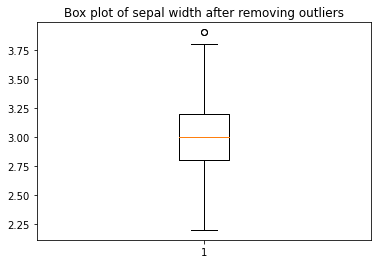

In [20]:
# Box plot
plt.boxplot(data['SW'])
plt.title('Box plot of sepal width after removing outliers')

Now our outliers are reduced

In [21]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting and scaling the data set

In [22]:
# Splitting the data set into features and targets
# We will take Classification as the target variable (ie, y) and all the others as feature variable (x)

In [23]:
y = data['Classification']
X = data.drop(['Classification'],axis=1)

In [24]:
# Scaling the dataset
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,0.222222,0.764706,0.067797,0.041667
1,0.166667,0.470588,0.067797,0.041667
2,0.416667,0.588235,0.050847,0.041667
3,0.083333,0.529412,0.084746,0.041667
4,0.194444,0.823529,0.067797,0.041667


In [25]:

# Our feature set is now scaled, all the values lies between 0 and 1
# Now let's split our data for training and testing

In [26]:
from sklearn.model_selection import train_test_split
# Creating instance
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=65, test_size = 0.2)

In [27]:
X_train.shape

(116, 4)

In [28]:
X_test.shape

(29, 4)

In [96]:
X = pd.DataFrame(X)
pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)*100

3    54.510243
2    31.194661
0    12.235696
1     2.059400
dtype: float64

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [50]:
#Let's try by building different models and checking the accuracy score of each.

### Logistic Regression

In [51]:
# Creating a model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_prediction = logistic_model.predict(X_test)

In [52]:
# For testing the goodness of fit of model
from sklearn.metrics import accuracy_score

In [53]:
print("Accuracy is", accuracy_score(y_test,y_prediction))


Accuracy is 0.9310344827586207


### SVM 

In [54]:
# linear classifier
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
print("The accuracy score using linear svm is ", accuracy_score(y_test,y_prediction))

The accuracy score using linear svm is  0.9310344827586207


In [ ]:
# let's try changing parameters and see whether there is any change in our accuracy score.

In [64]:
# Polynomial SVM
svm_poly = SVC(kernel ='poly', degree=3, gamma ='auto')
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
print("The accuracy score using polynomial svm is ", accuracy_score(y_test,y_prediction))

The accuracy score using polynomial svm is  0.9310344827586207


In [67]:
svm_poly = SVC(kernel ='rbf', decision_function_shape ='ovo', random_state=102, degree=5)
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
print("The accuracy score using polynomial svm is ", accuracy_score(y_test,y_prediction))

The accuracy score using polynomial svm is  0.9310344827586207


In [68]:
# No change in the accuracy score even after tuning of hyper parameters

### Random Forest 

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("The accuracy score using random forest classifier is ", accuracy_score(y_test,y_prediction))

The accuracy score using random forest classifier is  0.9310344827586207


In [70]:
# Trying with different parametrs
rft = RandomForestClassifier(n_estimators = 1000, max_depth=10, random_state=100, criterion = "gini", max_features ='log2')
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
print("The accuracy score using modified  random forest classifier is ", accuracy_score(y_test,y_prediction))

The accuracy score using modified  random forest classifier is  0.9310344827586207


In [97]:
# Hyper parameter tuning
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,
                         random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The accuracy score using modified  random forest classifier is ", accuracy_score(y_test,y_prediction))

The accuracy score using modified  random forest classifier is  0.9655172413793104


In [87]:
# We can see that now our accuracy score is increased to 96.5%.
# Let's try some other models also

### Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("The accuracy score  is ", accuracy_score(y_test,y_pred))

The accuracy score  is  0.9310344827586207


### knn 

In [90]:
from sklearn.neighbors import KNeighborsClassifier
# Find the optimum k value, for this we have to create a model with varied k values.
# For that first creating an empty list
acc_values = []
# taking values from 3 to 15 to a variable
neighbors = np.arange(3,15)
# Create a loop to create knn models for each k value
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    y_prediction = classifier.predict(X_test)
    acc= accuracy_score(y_test, y_prediction)
    acc_values.append(acc)
acc_values

[0.896551724137931,
 0.9310344827586207,
 0.9655172413793104,
 0.9310344827586207,
 0.9655172413793104,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207]

Text(0, 0.5, 'accuracy')

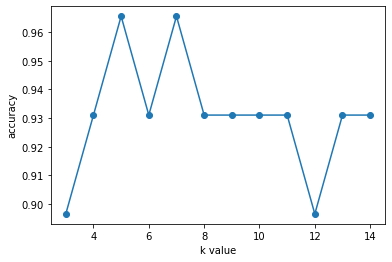

In [91]:
# 0.9655 is the highest accuracy value. Let's find the corresponding k value
# For that we plot a graph between the neighbor values (k values) and the accuracy values.
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [92]:
# We can see that the best accuracy is for k value 7. Now we can make a model with k=7
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

In [93]:
print("Accuracy is", accuracy_score(y_test,y_prediction))

Accuracy is 0.9655172413793104


We have tried 5 different models so far. We also tried hyper parametric tuning in all of them to get the best results. 
By analysing the accuracy scores of each of them, we can conclude that for the given data set **Knn and Random forest
classifier are the best models with an accuracy of 96.5%.** All other models such as Logistic Regresssion, Gradient Boosting
and SVM gives an accuracy of 93%.